**Evin, Marrylle Faith C.**
<br>**BSCS - 1**
<br>**CIS 1203 Group 1: Discrete Structures 2 TTh 10:30AM - 12:00PM**

1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

**Given the following graph, implement the algorithm in python**

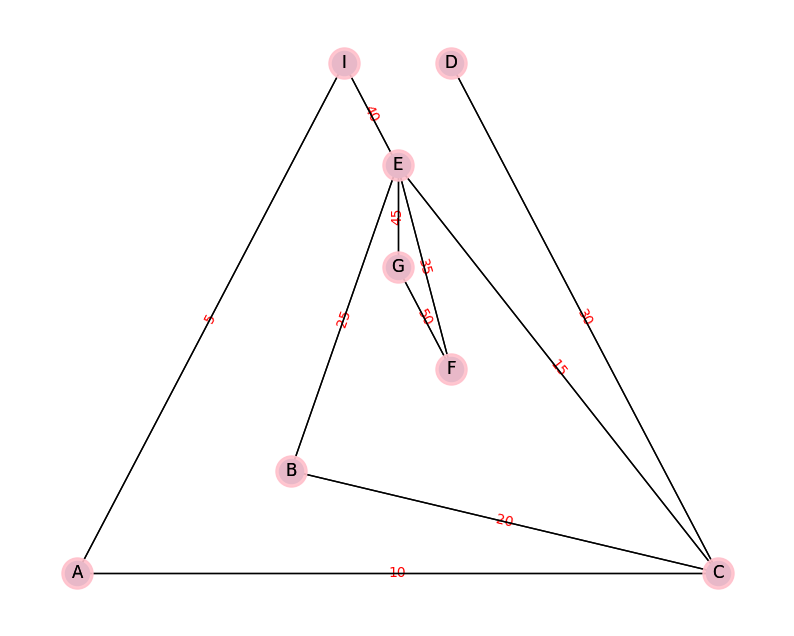

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

# 1. Kruskal's Algorithm


Solution Table:
----------------------------
Iteration | Edge Considered    | Weight    |Action Taken
----------------------------
1         | A - I              | 5         | Added
2         | A - C              | 10        | Added
3         | C - E              | 15        | Added
4         | E - F              | 35        | Added
5         | F - G              | 50        | Added
6         | C - B              | 20        | Not Added
7         | C - D              | 30        | Not Added
8         | B - E              | 25        | Not Added
9         | I - E              | 40        | Not Added
10        | G - E              | 45        | Not Added
----------------------------



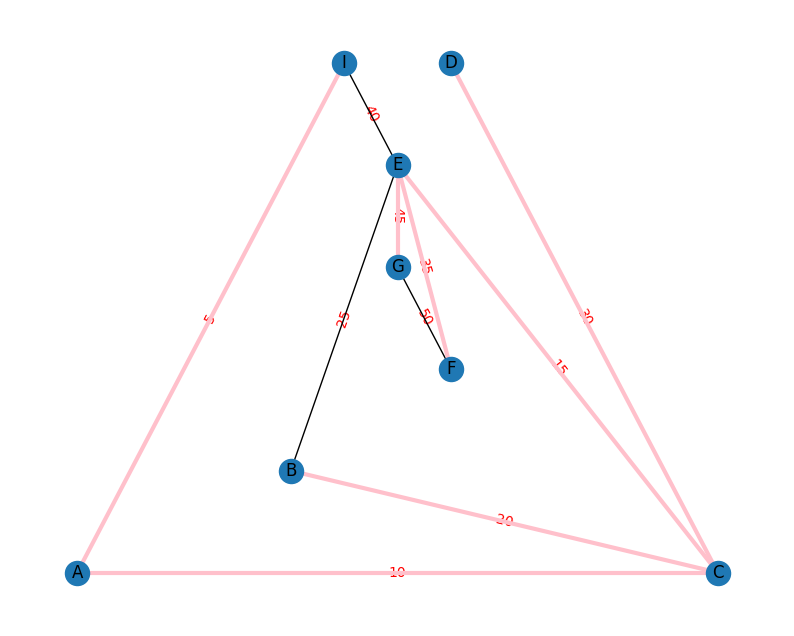

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

class DisjointSet:
    def __init__(self, vertices):
        self.parent = {vertex: vertex for vertex in vertices}
        self.rank = {vertex: 0 for vertex in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)
        if root1 != root2:
            if self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            elif self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

def kruskal(graph):
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    vertices = set(graph.nodes)
    minimum_spanning_tree = nx.Graph()
    disjoint_set = DisjointSet(vertices)

    for edge in edges:
        u, v, weight = edge
        if disjoint_set.find(u) != disjoint_set.find(v):
            disjoint_set.union(u, v)
            minimum_spanning_tree.add_edge(u, v, weight=weight['weight'])

    return minimum_spanning_tree

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

minimum_spanning_tree = kruskal(G)

# Solution table
solution_table = """
Solution Table:
----------------------------
Iteration | Edge Considered    | Weight    |Action Taken
----------------------------
1         | A - I              | 5         | Added
2         | A - C              | 10        | Added
3         | C - E              | 15        | Added
4         | E - F              | 35        | Added
5         | F - G              | 50        | Added
6         | C - B              | 20        | Not Added
7         | C - D              | 30        | Not Added
8         | B - E              | 25        | Not Added
9         | I - E              | 40        | Not Added
10        | G - E              | 45        | Not Added
----------------------------
"""

print(solution_table)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)  # Maintaining the layout
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='pink', width=3)
plt.show()


# 2. Prim's Algorithm

Solution Table:
Iteration Number     Vertex Added    Edge Added           Weight    
0                    I               A-I                  5         
1                    C               A-C                  10        
2                    E               C-E                  15        
3                    B               C-B                  20        
4                    D               C-D                  30        
5                    F               E-F                  35        
6                    G               E-G                  45        


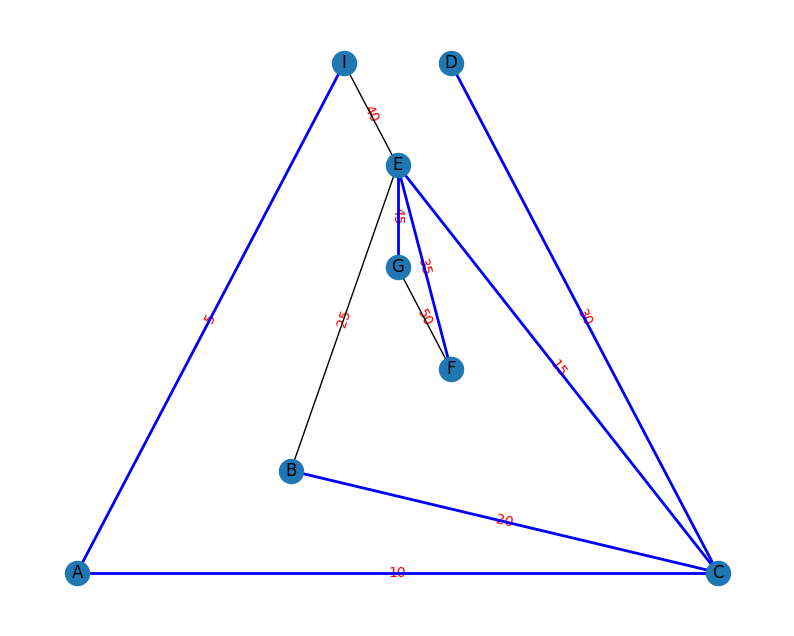

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

def prim(graph):
    # Initialize minimum spanning tree T with one vertex and no edges
    T = nx.Graph()
    # Choose any vertex v as the starting point
    starting_vertex = list(graph.nodes)[0]
    T.add_node(starting_vertex)
    # Set of vertices not yet included in T
    V = set(graph.nodes)
    V.remove(starting_vertex)
    
    # Initialize the solution table
    solution_table = [["Iteration Number", "Vertex Added", "Edge Added", "Weight"]]
    iteration = 0
    
    # Iterate until all vertices are added to T
    while V:
        min_weight = float('inf')
        min_edge = None
        new_vertex = None
        # Find the edge with the minimum weight that connects T to a vertex in V
        for vertex in T.nodes:
            for neighbor, weight in graph[vertex].items():
                if neighbor in V and weight['weight'] < min_weight:
                    min_weight = weight['weight']
                    min_edge = (vertex, neighbor)
                    new_vertex = neighbor
        # Add the minimum weight edge and the new vertex to T
        T.add_edge(*min_edge, weight=min_weight)
        T.add_node(new_vertex)
        # Remove the new vertex from V
        V.remove(new_vertex)
        
        # Add the solution to the solution table
        solution_table.append([iteration, new_vertex, f"{min_edge[0]}-{min_edge[1]}", min_weight])
        iteration += 1
    
    return T, solution_table

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

# Find the minimum spanning tree using Prim's algorithm and get the solution table
minimum_spanning_tree, solution_table = prim(G)

# Display the solution table
print("Solution Table:")
for row in solution_table:
    print("{:<20} {:<15} {:<20} {:<10}".format(*row))

# Display the graph and minimum spanning tree
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(minimum_spanning_tree, pos=pos, edge_color='blue', width=2)
plt.show()


# 3. Djitraka's Shortes Path Algorithm

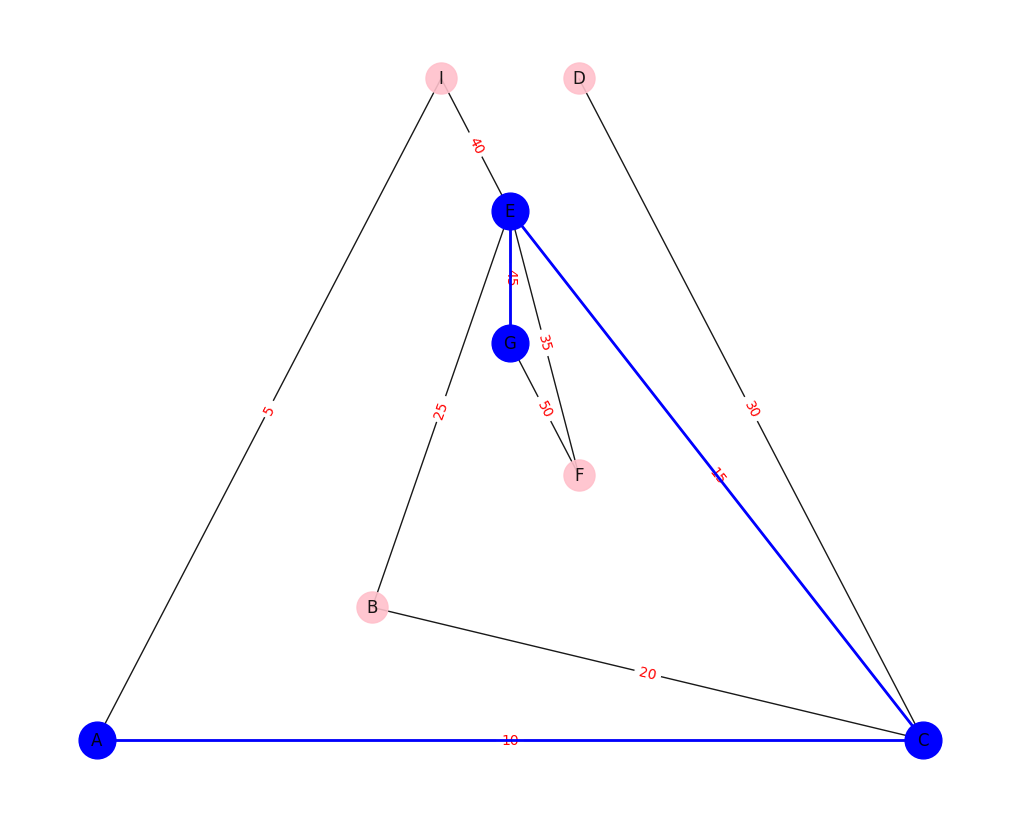

Shortest Path Table:
Destination	Shortest Path		Path Length
A		['A']			0
C		['A', 'C']			10
I		['A', 'I']			5
E		['A', 'C', 'E']			25
B		['A', 'C', 'B']			30
D		['A', 'C', 'D']			40
F		['A', 'C', 'E', 'F']			60
G		['A', 'C', 'E', 'G']			70


In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [
    ("A", "C", {'weight': 10}), ("A", "I", {'weight': 5}), ("C", "B", {'weight': 20}),
    ("C", "E", {'weight': 15}), ("C", "D", {'weight': 30}), ("B", "E", {'weight': 25}),
    ("I", "E", {'weight': 40}), ("E", "F", {'weight': 35}), ("F", "G", {'weight': 50}),
    ("G", "E", {'weight': 45})
]
G.add_edges_from(edgelist)

# Compute the shortest paths from node 'A' using Dijkstra's algorithm
shortest_paths = nx.single_source_dijkstra_path(G, 'A', weight='weight')

# Extract the shortest path from node 'A' to 'G'
shortest_path_nodes = shortest_paths['G']
shortest_path_edges = [(shortest_path_nodes[i], shortest_path_nodes[i+1]) for i in range(len(shortest_path_nodes)-1)]

# Draw the graph with shortest path highlighted
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_nodes, node_color='blue', node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='blue', width=2)
plt.show()

# Shortest path table
print("Shortest Path Table:")
print("Destination\tShortest Path\t\tPath Length")
for destination, path in shortest_paths.items():
    print(f"{destination}\t\t{path}\t\t\t{nx.shortest_path_length(G, 'A', destination, weight='weight')}")
